<a href="https://colab.research.google.com/github/monroews/Plant_Performance/blob/master/Plant_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install aguaclara

     |████████████████████████████████| 92kB 2.5MB/s 
     |████████████████████████████████| 163kB 4.5MB/s 
  Created wheel for aguaclara: filename=aguaclara-0.2.0-cp36-none-any.whl size=99623 sha256=2ad923b74e6731ca143b44be308b0c109fbfd98bd1d3395d00dea904e4880b5c
  Stored in directory: /root/.cache/pip/wheels/34/e9/34/0d3722243083a982623290c205c14a08b54ed290ee29219fd2
  Created wheel for pint: filename=Pint-0.8.1-py2.py3-none-any.whl size=134156 sha256=7eac35b502f86aa14ee2a02683bf2db3d78ca34944bd3d61a6092679858491a4
  Stored in directory: /root/.cache/pip/wheels/b4/56/36/7c4d6a4e3660e233b95e3b0482551915cb184abca0f93ee1dd
Successfully built aguaclara pint


In [0]:
import aguaclara as ac
from aguaclara.core.units import unit_registry as u
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [0]:
basepath = "https://raw.githubusercontent.com/monroews/Plant_Performance/master/"
plants = ['Moroceli2016','Jesus_de_Otoro','La_Concordia','Ithaca_WTP_data_2018']
print(basepath+plants[0]+'.tsv')
#dtype={'b':np.float64,'c':np.float64, 'd':np.float64,'e':np.float64}
pddata = [pd.read_csv(basepath+i+'.tsv',sep='\t') for i in plants]
#pddata = [pd.read_csv(basepath+i+'.tsv',sep='\t') for i in plants]


https://raw.githubusercontent.com/monroews/Plant_Performance/master/Moroceli2016.tsv


In [0]:
font = 'x-large'
params = {'legend.fontsize': font,
         'figure.figsize': (8,6),
         'axes.labelsize': font,
         'axes.titlesize':font,
         'xtick.labelsize':font,
         'ytick.labelsize':font,
         'axes.formatter.useoffset':False}
plt.rcParams.update(params)


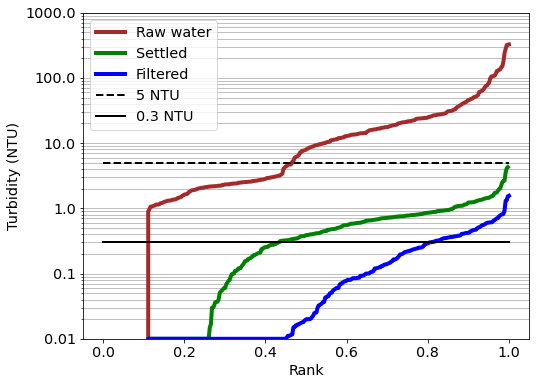

Moroceli2016 Datos de 42335.0 a 42704.0


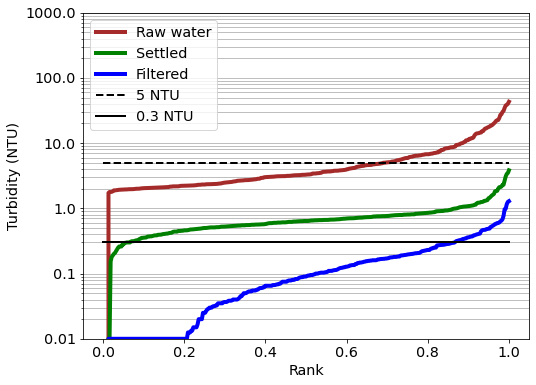

Jesus_de_Otoro Datos de 42339.0 a 42717.0


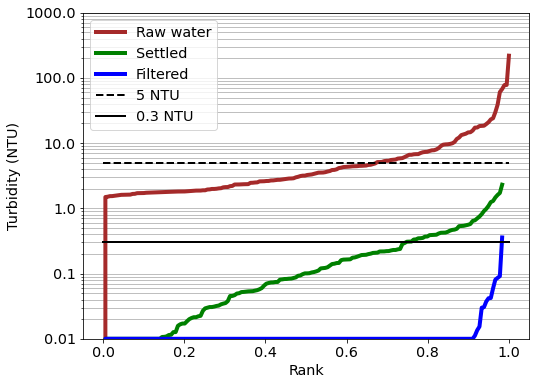

La_Concordia Datos de 43343.0 a 43527.0


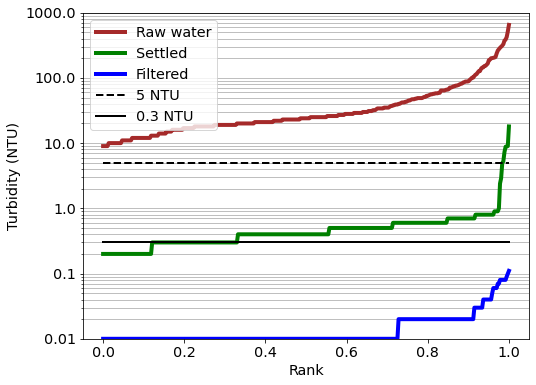

Ithaca_WTP_data_2018 Datos de 43101.0 a 43465.0


In [0]:
timelist = []
rawlist = []
sedlist = []
filterlist = []
ranklist = []
rawsortlist = []
sedsortlist = []
filtsortlist = []

for i in range(len(plants)):
  timeall = np.array(pddata[i]['time'])
  firstday = int(np.trunc(timeall[0]))
  lastday = int(np.trunc(timeall[-1]))
  days = lastday-firstday+1
  time = np.linspace(firstday,lastday,days)
  rawall = np.array(pddata[i]['raw (NTU)']) * u.NTU
  for j in range(len(rawall)):
    rawall[j]=max(rawall[j],0.01*u.NTU)
  sedall = np.array(pddata[i]['sed (NTU)']) * u.NTU
  for j in range(len(sedall)):
    sedall[j]=max(sedall[j],0.01*u.NTU)
  filterall = np.array(pddata[i]['filter (NTU)']) * u.NTU
  for j in range(len(filterall)):
    filterall[j]=max(filterall[j],0.01*u.NTU)
  
  raw = np.zeros(days)
  sed = np.zeros(days)
  filt = np.zeros(days)
  idx_start = 0
  for j in range(days):
    if j<days-1:
      idx_end = np.searchsorted(np.trunc(timeall)-time[j+1],0)
    else:
      idx_end = len(timeall)
    if idx_end > idx_start:
      raw[j] = np.average(rawall[idx_start:idx_end])
      sed[j] = np.average(sedall[idx_start:idx_end])
      filt[j] = np.average(filterall[idx_start:idx_end])
    idx_start=idx_end
  
  timelist.append(time)
  rawlist.append(raw)
  sedlist.append(sed)
  filterlist.append(filt)
  #Remove NaNs from sorted arrays. These NaNs are partly due to missing data and partly due to plant shutdowns during high turbidity
  firstNaN = days - (np.argwhere(np.isnan(raw))).shape[0]
  #copy the array, sort the copy, then resize it to eliminate NaNs
  rawsort = np.resize(np.sort(np.array(raw,copy=True)),firstNaN)
  sedsort = np.resize(np.sort(np.array(sed,copy=True)),firstNaN)
  filtsort = np.resize(np.sort(np.array(filt,copy=True)),firstNaN)
  rank = np.linspace(0,1,len(rawsort),endpoint=True)
  ranklist.append(rank)
  rawsortlist.append(rawsort)
  sedsortlist.append(sedsort)
  filtsortlist.append(filtsort)
  plt.plot(rank,rawsort,linewidth=4, color='brown')
  plt.plot(rank,sedsort,linewidth=4, color='green')
  plt.plot(rank,filtsort,linewidth=4, color='blue')
  plt.plot([0,1],[5,5],linewidth=2, color='black', linestyle='dashed')
  plt.plot([0,1],[0.3,0.3],linewidth=2, color='black')
  #plt.ylabel('Turbidez (UTN)')
  #plt.xlabel('Datos ordenados')
  plt.ylabel('Turbidity (NTU)')
  plt.xlabel('Rank')
  plt.yscale('log')
  plt.ylim(ymin=0.01,ymax=1000)
  plt.grid(which='both',axis='y')
  #plt.legend(['Agua cruda','Decantada','Filtrada','5 UTN','0.3 UTN'])
  plt.legend(['Raw water','Settled','Filtered','5 NTU','0.3 NTU'])
  plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x}"))
  plt.show()
  print(plants[i],'Datos de',time[0], 'a', time[len(time)-1])


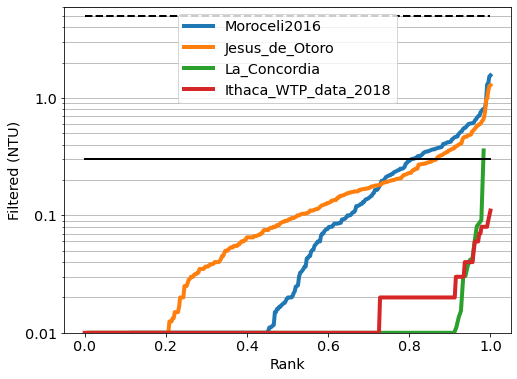

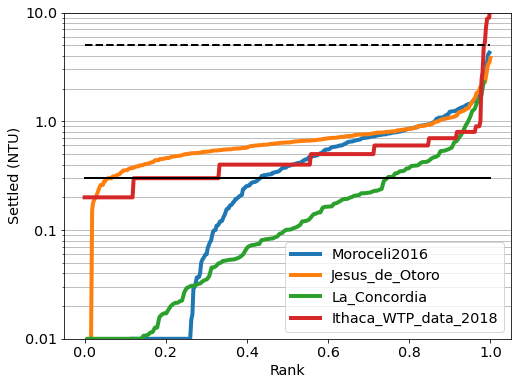

In [0]:
for i in range(0,len(plants)):
  plt.plot(ranklist[i],filtsortlist[i],linewidth=4)

plt.plot([0,1],[0.3,0.3],linewidth=2, color='black')
plt.plot([0,1],[5,5],linewidth=2, color='black', linestyle='dashed')
#plt.ylabel('Filtrada (UTN)')
#plt.xlabel('Datos ordenados')
plt.ylabel('Filtered (NTU)')
plt.xlabel('Rank')
plt.yscale('log')
plt.ylim(ymin=0.01,ymax=6)
plt.grid(which='both',axis='y')
plt.legend(plants)
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x}"))
plt.show()

for i in range(0,len(plants)):
  plt.plot(ranklist[i],sedsortlist[i],linewidth=4)

plt.plot([0,1],[0.3,0.3],linewidth=2, color='black')
plt.plot([0,1],[5,5],linewidth=2, color='black', linestyle='dashed')
#plt.ylabel('Decantada (UTN)')
#plt.xlabel('Datos ordenados')
plt.ylabel('Settled (NTU)')
plt.xlabel('Rank')
plt.yscale('log')
plt.ylim(ymin=0.01,ymax=10)
plt.grid(which='both',axis='y')
plt.legend(plants)
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x}"))
plt.show()

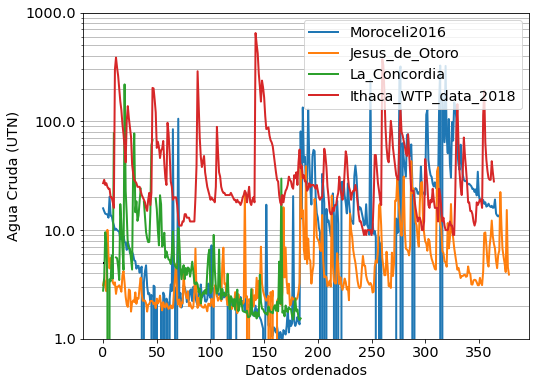

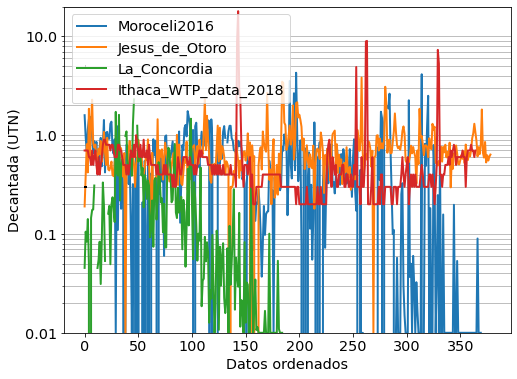

In [0]:
for i in range(0,len(plants)):
  plt.plot(timelist[i]-timelist[i][0],rawlist[i],linewidth=2)

plt.plot([0,1],[0.3,0.3],linewidth=2, color='black')
plt.plot([0,1],[5,5],linewidth=2, color='black', linestyle='dashed')
plt.ylabel('Agua Cruda (UTN)')
plt.xlabel('Datos ordenados')
plt.yscale('log')
plt.ylim(ymin=1,ymax=1000)
plt.grid(which='both',axis='y')
plt.legend(plants)
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x}"))
plt.show()

for i in range(0,len(plants)):
  plt.plot(timelist[i]-timelist[i][0],sedlist[i],linewidth=2)

plt.plot([0,1],[0.3,0.3],linewidth=2, color='black')
plt.plot([0,1],[5,5],linewidth=2, color='black', linestyle='dashed')
plt.ylabel('Decantada (UTN)')
plt.xlabel('Datos ordenados')
plt.yscale('log')
plt.ylim(ymin=0.01,ymax=20)
plt.grid(which='both',axis='y')
plt.legend(plants)
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x}"))
plt.show()

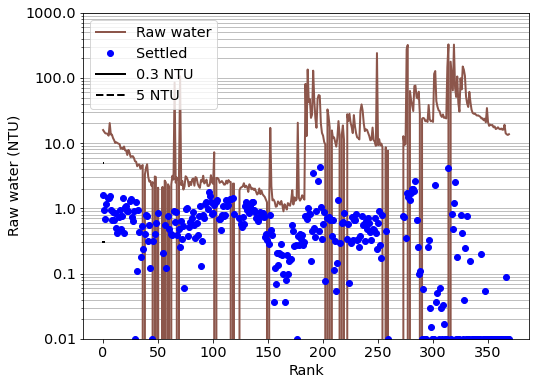

Moroceli2016


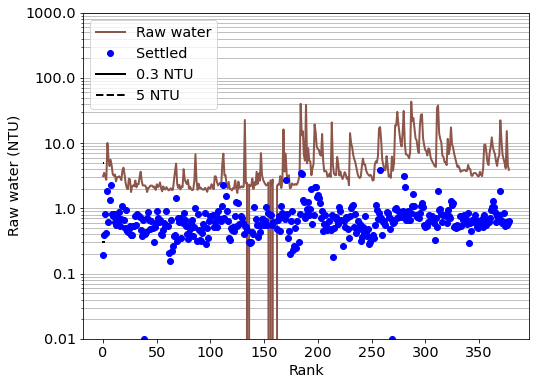

Jesus_de_Otoro


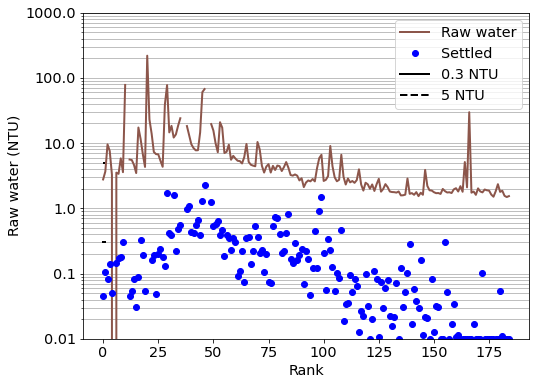

La_Concordia


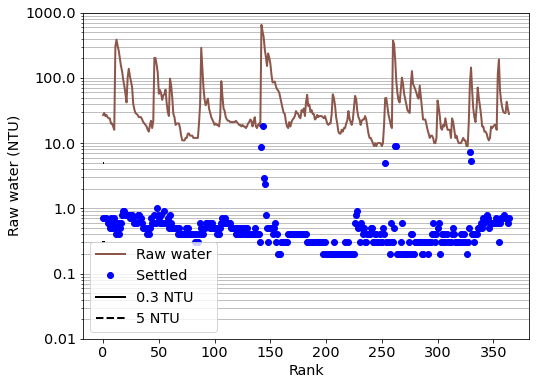

Ithaca_WTP_data_2018


In [0]:
for i in range(0,len(plants)):
  plt.plot(timelist[i]-timelist[i][0],rawlist[i],'tab:brown',linewidth=2)
  plt.plot(timelist[i]-timelist[i][0],sedlist[i],'bo')
  plt.plot([0,1],[0.3,0.3],linewidth=2, color='black')
  plt.plot([0,1],[5,5],linewidth=2, color='black', linestyle='dashed')
  #plt.ylabel('Agua Cruda (UTN)')
  #plt.xlabel('Datos ordenados')
  plt.ylabel('Raw water (NTU)')
  plt.xlabel('Rank')
  plt.yscale('log')
  plt.ylim(ymin=0.01,ymax=1000)
  plt.grid(which='both',axis='y')
  #plt.legend(['Agua cruda','Decantada','0.3 UTN','5 UTN'])
  plt.legend(['Raw water','Settled','0.3 NTU','5 NTU'])
  plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
  plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x}"))
  plt.show()
  print(plants[i])


In [0]:
(214000 * u.USD/(u.L/u.s)).to(u.MUSD/(u.Mgal/u.day))

<Quantity(9.375904187222217, 'day * megadollar / megagallon')>

In [0]:
(2*u.m).to(u.ft)

<Quantity(6.561679790026247, 'foot')>

In [0]:
(120 * u.L/u.s).to(u.Mgal/u.day)

<Quantity(2.738935838849283, 'megagallon / day')>